<a href="https://colab.research.google.com/github/HenriARM/ML/blob/master/svm/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machine (Hard SVM for Binary classification)
Reference: https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8

In [0]:
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs 
  
# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 
  
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show()  

In [0]:
# X, y = make_blobs(n_samples=250, centers=2, random_state=0, cluster_std=0.60)
# y[y == 0] = -1 #all elements which are 0 turn to -1
# tmp = np.ones(len(X))
# # TODO: find better thing
# y = y * tmp # turn array from int64 to float for cvxopt  

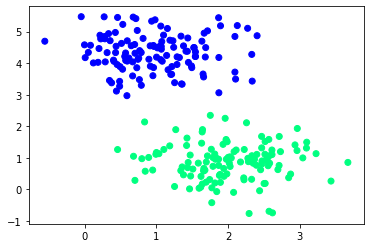

In [0]:
from matplotlib import pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

Primal quadratic program
\begin{equation}
X = [x_1y_1 x_2y_2  \cdots x_ny_n]\\
\frac{1}{2} x^{T} \cdot P \cdot x + q^T \cdot x\\
P = X^T\cdot X\\
q = \underbrace{[-1 \cdots -1]}_{N}\\
A = y^T\\
b = 0\\
\end{equation}

In [0]:
import numpy as np
from cvxopt import matrix
from cvxopt.solvers import qp

class SVM:
  def fit(self, x, y):
    samples, dimensions = x.shape
    K = np.zeros((samples, samples))
    for i in range(samples):
      for j in range(samples):
        K[i,j] = np.dot(x[i],x[j]) # matrix of all sample combination dot product
    P = matrix (np.outer(y, y) * K)
    # TODO: why whole matrix is -1
    q = matrix(np.ones(samples) * -1)
    A = matrix(y, (1, samples))
    b = matrix(0.0)
    # TODO: why np.diag?
    G = matrix(np.diag(np.ones(samples) * -1))
    h = matrix(np.zeros(samples))
    solution = solvers.qp(P, q, G, h, A, b)
    a = np.ravel(solution['x'])
    # Lagrange have non zero lagrange multipliers
    # TODO: check what's next
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    self.a = a[sv]
    self.sv = x[sv]
    self.sv_y = y[sv]
    self.b = 0
    for n in range(len(self.a)):
      self.b += self.sv_y[n]
      self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
    self.b /= len(self.a)
    self.w = np.zeros(dimensions)
    for n in range(len(self.a)):
      self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        
    def project(self, x):
        return np.dot(x, self.w) + self.b 
    def predict(self, x):
        return np.sign(self.project(x))

In [0]:
# from sklearn.datasets.samples_generator import make_blobs
# from sklearn.model_selection import train_test_split
# TODO: change random state to 80 20 
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
svm = SVM()
svm.fit(x_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  2e-15  9e-15
 6: -4.0061e+00 -4.0104e+00  4e-03  2e-17  5e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  9e-16  5e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  1e-15  6e-15
Optimal solution found.
{'x': <187x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <187x1 matrix, tc='d'>, 'z': <187x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 4.2964964768998026e-07, 'relative gap': 1.071608717182481e-07, 'primal objective': -4.009389255619657, 'dual objective': -4.00938968526931, 'primal infeasibility': 1.336885555457682e-15, 'dual infeasibility': 5.828807892885631e-15, 'primal slack': 1.8128974870868806e-10, 'dual slack': 4.8827943374841605e-09, 'iterations': 8}


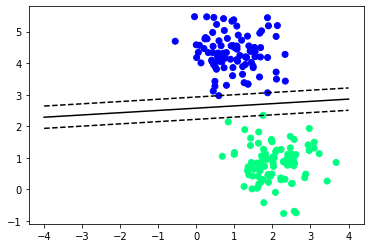

In [0]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')
# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')
# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')